In [1]:
#SOCIAL NETWORK FRIEND SUGGESTION
from collections import deque, defaultdict

class SocialNetwork:
    def __init__(self):
        # Adjacency list representation for efficient storage and traversal
        self.graph = defaultdict(list)
        self.users = set()
    
    def add_friendship(self, user1, user2):
        """Add undirected friendship between two users"""
        self.graph[user1].append(user2)
        self.graph[user2].append(user1)
        self.users.add(user1)
        self.users.add(user2)
    
    def suggest_friends_bfs(self, start_user):
        """
        Perform BFS to find friend suggestions based on mutual friends
        Time Complexity: O(V + E) where V=vertices (users), E=edges (friendships)
        """
        if start_user not in self.graph:
            return []
        
        suggested_friends = []
        visited = set([start_user])
        queue = deque([(start_user, 0)])  # (current_user, depth)
        
        while queue:
            current_user, depth = queue.popleft()
            
            # Only explore up to depth 2 (friends of friends)
            if depth >= 2:
                continue
                
            for friend in self.graph[current_user]:
                if friend not in visited:
                    visited.add(friend)
                    queue.append((friend, depth + 1))
                    
                    # Friend-of-friend at depth 2 who is not already a direct friend
                    if depth == 1 and friend not in self.graph[start_user]:
                        suggested_friends.append(friend)
        
        return suggested_friends
    
    def suggest_friends_dfs(self, start_user):
        """
        Perform DFS to find friend suggestions
        Time Complexity: O(V + E)
        """
        if start_user not in self.graph:
            return []
        
        suggested_friends = []
        visited = set()
        
        def dfs(current_user, depth):
            if depth > 2 or current_user in visited:
                return
            
            visited.add(current_user)
            
            for friend in self.graph[current_user]:
                if friend not in visited:
                    # Friend-of-friend at depth 2 who is not already a direct friend
                    if depth == 1 and friend not in self.graph[start_user]:
                        suggested_friends.append(friend)
                    dfs(friend, depth + 1)
        
        # Start DFS from direct friends (depth 1)
        visited.add(start_user)
        for direct_friend in self.graph[start_user]:
            dfs(direct_friend, 1)
        
        return suggested_friends

def main():
    """Main function demonstrating the social network friend suggestion system"""
    
    # 1. GRAPH MODELING - Create social network
    print("SOCIAL NETWORK FRIEND SUGGESTION SYSTEM")
    print("=" * 50)
    
    network = SocialNetwork()
    
    # Sample input connections as specified in the task
    friendships = [
        ('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'),
        ('C', 'F'), ('C', 'G'), ('D', 'H'), ('E', 'I')
    ]
    
    # Build the graph
    for user1, user2 in friendships:
        network.add_friendship(user1, user2)
    
    print("Social Network Created:")
    print("Friendships:", friendships)
    print("Users:", sorted(network.users))
    print("\n" + "=" * 50)
    
    # 2. ALGORITHM DESIGN - Test friend suggestions
    test_users = ['A', 'B', 'C', 'D']
    
    for user in test_users:
        print(f"\nFRIEND SUGGESTIONS FOR USER '{user}':")
        print("-" * 30)
        
        # BFS-based suggestions
        bfs_suggestions = network.suggest_friends_bfs(user)
        print(f"BFS Suggestions: {bfs_suggestions}")
        
        # DFS-based suggestions  
        dfs_suggestions = network.suggest_friends_dfs(user)
        print(f"DFS Suggestions: {dfs_suggestions}")
    
    # 3. ANALYSIS
    print("\n" + "=" * 50)
    print("ALGORITHM ANALYSIS")
    print("=" * 50)
    
    print("""
TIME COMPLEXITY ANALYSIS:

BFS Approach:
- Time Complexity: O(V + E)
  Where V = number of users (vertices)
        E = number of friendships (edges)
- Explanation: Each user and friendship is processed exactly once
- In our sample: V = 8 users, E = 8 friendships → O(16) operations

DFS Approach:
- Time Complexity: O(V + E)
- Same complexity as BFS but different traversal order
- Both algorithms efficiently explore the graph structure

REAL-WORLD MAPPING:
- Users → Vertices (Nodes)
- Friendships → Edges
- Social Network → Undirected Graph
- Friend Suggestions → Nodes at distance 2 from source

SCALABILITY FOR LARGE NETWORKS:
- Facebook: ~3 billion users, ~1 trillion friendships
- BFS/DFS with depth limit of 2 remains efficient because:
  1. Average user has 150-200 friends (small branching factor)
  2. Limited to 2 levels prevents exponential explosion
  3. O(V + E) scales linearly with network size
  4. Sparse graphs (E ≈ V × average_degree) remain manageable

PRACTICAL CONSIDERATIONS:
1. Memory: Adjacency list uses O(V + E) space - efficient for sparse networks
2. Performance: BFS generally preferred for friend suggestions as it finds closest connections first
3. Real-world optimizations: Precomputation, caching, and distributed processing for massive scales
""")

if __name__ == "__main__":
    main()

SOCIAL NETWORK FRIEND SUGGESTION SYSTEM
Social Network Created:
Friendships: [('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G'), ('D', 'H'), ('E', 'I')]
Users: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']


FRIEND SUGGESTIONS FOR USER 'A':
------------------------------
BFS Suggestions: ['D', 'E', 'F', 'G']
DFS Suggestions: ['D', 'E', 'F', 'G']

FRIEND SUGGESTIONS FOR USER 'B':
------------------------------
BFS Suggestions: ['C', 'H', 'I']
DFS Suggestions: ['C', 'H', 'I']

FRIEND SUGGESTIONS FOR USER 'C':
------------------------------
BFS Suggestions: ['B']
DFS Suggestions: ['B']

FRIEND SUGGESTIONS FOR USER 'D':
------------------------------
BFS Suggestions: ['A', 'E']
DFS Suggestions: ['A', 'E']

ALGORITHM ANALYSIS

TIME COMPLEXITY ANALYSIS:

BFS Approach:
- Time Complexity: O(V + E)
  Where V = number of users (vertices)
        E = number of friendships (edges)
- Explanation: Each user and friendship is processed exactly once
- In our sample: V = 8 users, E

In [2]:
# ROUTE FINDING ON GOOGLE MAPS 
from collections import defaultdict
import sys

class NavigationSystem:
    def __init__(self):
        # Graph representation: adjacency list with weighted edges
        self.graph = defaultdict(list)
        self.vertices = set()
    
    def add_road(self, source, destination, weight):
        """Add a directed road with weight between two locations"""
        self.graph[source].append((destination, weight))
        self.vertices.add(source)
        self.vertices.add(destination)
    
    def bellman_ford(self, start_city):
        """
        Implement Bellman-Ford algorithm for shortest path computation
        Time Complexity: O(V * E) where V=vertices, E=edges
        """
        # Initialize distances: infinity for all except start
        dist = {vertex: float('inf') for vertex in self.vertices}
        dist[start_city] = 0
        
        # Relax all edges |V| - 1 times
        for _ in range(len(self.vertices) - 1):
            updated = False
            for u in self.graph:
                for v, weight in self.graph[u]:
                    if dist[u] != float('inf') and dist[u] + weight < dist[v]:
                        dist[v] = dist[u] + weight
                        updated = True
            
            # Early termination if no updates
            if not updated:
                break
        
        # Check for negative weight cycles
        negative_cycle = False
        cycle_vertices = set()
        
        for u in self.graph:
            for v, weight in self.graph[u]:
                if dist[u] != float('inf') and dist[u] + weight < dist[v]:
                    negative_cycle = True
                    cycle_vertices.add(v)
                    # For vertices affected by negative cycle, set to -inf
                    dist[v] = float('-inf')
        
        return dist, negative_cycle, cycle_vertices
    
    def get_shortest_paths(self, start_city):
        """Get shortest paths and handle negative cycle detection"""
        distances, has_negative_cycle, cycle_vertices = self.bellman_ford(start_city)
        
        print(f"\nSHORTEST PATHS FROM '{start_city}':")
        print("-" * 40)
        
        for vertex in sorted(distances.keys()):
            dist = distances[vertex]
            if vertex == start_city:
                print(f"{vertex}: 0 (start)")
            elif dist == float('inf'):
                print(f"{vertex}: Unreachable")
            elif dist == float('-inf'):
                print(f"{vertex}: -∞ (negative cycle)")
            else:
                print(f"{vertex}: {dist}")
        
        if has_negative_cycle:
            print(f"\n⚠️  WARNING: Negative weight cycle detected!")
            print(f"Vertices affected by negative cycle: {sorted(cycle_vertices)}")
            print("Paths to these vertices can be made arbitrarily short")
        else:
            print(f"\n✓ No negative weight cycles detected from '{start_city}'")
        
        return distances, has_negative_cycle

def demonstrate_algorithm_steps():
    """Demonstrate the step-by-step execution of Bellman-Ford"""
    print("\n" + "="*60)
    print("BELLMAN-FORD ALGORITHM STEP-BY-STEP")
    print("="*60)
    
    # Create a simple example to show the algorithm steps
    simple_gps = NavigationSystem()
    simple_roads = [
        ('A', 'B', 4),
        ('A', 'C', 5),
        ('B', 'C', -2),
        ('B', 'D', 1),
        ('C', 'D', 3)
    ]
    
    for source, dest, weight in simple_roads:
        simple_gps.add_road(source, dest, weight)
    
    print("Simple Graph for Step-by-Step Demonstration:")
    for road in simple_roads:
        print(f"  {road[0]} → {road[1]}: {road[2]}")
    
    vertices = sorted(simple_gps.vertices)
    dist = {v: float('inf') for v in vertices}
    dist['A'] = 0
    
    print(f"\nInitial distances: {dist}")
    
    # Relaxation steps
    for i in range(len(vertices) - 1):
        print(f"\n--- Relaxation Pass {i+1} ---")
        updated = False
        
        for u in simple_gps.graph:
            for v, weight in simple_gps.graph[u]:
                old_dist = dist[v]
                if dist[u] != float('inf') and dist[u] + weight < dist[v]:
                    dist[v] = dist[u] + weight
                    print(f"  Update {v}: {old_dist} → {dist[v]} (via {u})")
                    updated = True
        
        print(f"  Distances after pass {i+1}: {dist}")
        if not updated:
            print("  No changes - early termination")
            break

def main():
    """Main function demonstrating route finding with Bellman-Ford"""
    
    print("GOOGLE MAPS ROUTE FINDING WITH BELLMAN-FORD")
    print("=" * 55)
    
    # Create navigation system
    gps = NavigationSystem()
    
    # 1. GRAPH MODELING - Cities as nodes, roads as directed edges with weights
    roads = [
        # (source, destination, weight)
        ('A', 'B', 4),    # Positive weight
        ('A', 'C', 5),    # Positive weight  
        ('B', 'C', -2),   # Negative weight
        ('B', 'D', 1),    # Positive weight
        ('C', 'D', 3),    # Positive weight
        ('C', 'E', 4),    # Positive weight
        ('D', 'E', -1),   # Negative weight
        ('E', 'F', 2),    # Positive weight
        ('F', 'B', -5)    # Negative weight - creates cycle: B→C→D→E→F→B
    ]
    
    # Build the graph
    for source, dest, weight in roads:
        gps.add_road(source, dest, weight)
    
    print("ROAD NETWORK CREATED:")
    print("Roads (source → destination: weight):")
    for road in roads:
        print(f"  {road[0]} → {road[1]}: {road[2]}")
    
    print(f"\nCities: {sorted(gps.vertices)}")
    
    # Show the negative cycle explicitly
    print(f"\nNEGATIVE CYCLE DETECTION:")
    print("Cycle: B → C → D → E → F → B")
    cycle_weight = (-2) + 3 + (-1) + 2 + (-5)  # B→C→D→E→F→B
    print(f"Cycle total weight: {cycle_weight} (negative cycle)")
    
    # 2. ALGORITHM DESIGN - Test Bellman-Ford from different starting points
    start_cities = ['A', 'D']
    
    for start_city in start_cities:
        print(f"\n{'='*55}")
        print(f"ROUTE FINDING FROM CITY '{start_city}'")
        print(f"{'='*55}")
        
        distances, has_cycle = gps.get_shortest_paths(start_city)
    
    # Demonstrate algorithm steps
    demonstrate_algorithm_steps()
    
    # 3. ANALYSIS
    print(f"\n{'='*55}")
    print("ALGORITHM ANALYSIS")
    print(f"{'='*55}")
    
    V = len(gps.vertices)
    E = sum(len(gps.graph[v]) for v in gps.graph)
    
    print(f"""
GRAPH COMPLEXITY:
- Vertices (V): {V}
- Edges (E): {E}
- Time Complexity: O(V × E) = O({V} × {E}) = O({V * E})

WHY BELLMAN-FORD IS ESSENTIAL FOR REAL-WORLD NAVIGATION:

1. HANDLES REAL-WORLD SCENARIOS:
   - Traffic conditions that create time savings (negative weights)
   - Toll roads with discounts or rebates
   - Multi-modal transport with different cost structures

2. SAFETY FEATURE:
   - Detects when route costs can be made arbitrarily low
   - Prevents infinite loops in route calculation
   - Provides warnings about unreliable paths

3. COMPARISON WITH DIJKSTRA:
   - Dijkstra: O(E + V log V) - faster but fails with negative weights
   - Bellman-Ford: O(V × E) - slower but handles all cases
   - Choice depends on whether negative weights are possible

REAL-WORLD OPTIMIZATIONS:
1. Early termination when no improvements occur
2. Bidirectional search for specific destination queries  
3. Hierarchical approaches for continental-scale routing
4. Caching frequently computed routes

APPLICATION BEYOND NAVIGATION:
- Financial arbitrage detection
- Network routing protocols
- Resource allocation systems
- Game theory and economic modeling
""")

if __name__ == "__main__":
    main()

GOOGLE MAPS ROUTE FINDING WITH BELLMAN-FORD
ROAD NETWORK CREATED:
Roads (source → destination: weight):
  A → B: 4
  A → C: 5
  B → C: -2
  B → D: 1
  C → D: 3
  C → E: 4
  D → E: -1
  E → F: 2
  F → B: -5

Cities: ['A', 'B', 'C', 'D', 'E', 'F']

NEGATIVE CYCLE DETECTION:
Cycle: B → C → D → E → F → B
Cycle total weight: -3 (negative cycle)

ROUTE FINDING FROM CITY 'A'

SHORTEST PATHS FROM 'A':
----------------------------------------
A: 0 (start)
B: -∞ (negative cycle)
C: -∞ (negative cycle)
D: -∞ (negative cycle)
E: -∞ (negative cycle)
F: -∞ (negative cycle)

⚠️  WARNING: Negative weight cycle detected!
Vertices affected by negative cycle: ['B', 'C', 'D', 'E', 'F']
Paths to these vertices can be made arbitrarily short

ROUTE FINDING FROM CITY 'D'

SHORTEST PATHS FROM 'D':
----------------------------------------
A: Unreachable
B: -∞ (negative cycle)
C: -∞ (negative cycle)
D: 0 (start)
E: -∞ (negative cycle)
F: -∞ (negative cycle)

⚠️  WARNING: Negative weight cycle detected!
Vertices 

In [3]:
# EMERGENCY RESPONSE SYSTEM

import heapq
from collections import defaultdict
import time

class EmergencyResponseSystem:
    def __init__(self):
        # Adjacency list for efficient graph storage
        self.graph = defaultdict(list)
        self.intersections = set()
    
    def add_road(self, intersection1, intersection2, travel_time):
        """Add bidirectional road with travel time between intersections"""
        self.graph[intersection1].append((intersection2, travel_time))
        self.graph[intersection2].append((intersection1, travel_time))
        self.intersections.add(intersection1)
        self.intersections.add(intersection2)
    
    def dijkstra(self, start_intersection):
        """
        Implement Dijkstra's algorithm using min-heap priority queue
        Time Complexity: O(E log V) where E=edges, V=vertices
        """
        # Initialize distances: infinity for all except start
        distances = {intersection: float('inf') for intersection in self.intersections}
        distances[start_intersection] = 0
        
        # Priority queue: (distance, intersection)
        priority_queue = [(0, start_intersection)]
        
        # Keep track of shortest path tree
        previous = {}
        
        while priority_queue:
            current_distance, current_intersection = heapq.heappop(priority_queue)
            
            # If we found a better path already, skip processing
            if current_distance > distances[current_intersection]:
                continue
            
            # Explore neighbors
            for neighbor, travel_time in self.graph[current_intersection]:
                distance = current_distance + travel_time
                
                # If found shorter path to neighbor
                if distance < distances[neighbor]:
                    distances[neighbor] = distance
                    previous[neighbor] = current_intersection
                    heapq.heappush(priority_queue, (distance, neighbor))
        
        return distances, previous
    
    def get_shortest_path(self, previous, start, target):
        """Reconstruct the shortest path from start to target"""
        if target not in previous:
            return None
        
        path = []
        current = target
        
        while current != start:
            path.append(current)
            current = previous[current]
        
        path.append(start)
        path.reverse()
        return path
    
    def emergency_response(self, emergency_location, hospital_location):
        """
        Find fastest route from emergency location to hospital
        """
        print(f"\n🚑 EMERGENCY RESPONSE ACTIVATED")
        print(f"📍 Emergency at: {emergency_location}")
        print(f"🏥 Destination: {hospital_location}")
        print("-" * 50)
        
        start_time = time.time()
        distances, previous = self.dijkstra(emergency_location)
        computation_time = (time.time() - start_time) * 1000  # Convert to ms
        
        if distances[hospital_location] == float('inf'):
            print("❌ CRITICAL: No route available to hospital!")
            return None, float('inf')
        
        # Get the actual path
        path = self.get_shortest_path(previous, emergency_location, hospital_location)
        
        print(f"✅ Fastest route found in {computation_time:.2f} ms")
        print(f"⏱️  Total travel time: {distances[hospital_location]} minutes")
        print(f"🛣️  Optimal path: {' → '.join(path)}")
        
        return path, distances[hospital_location]
    
    def get_all_response_times(self, emergency_location):
        """
        Get shortest times to all intersections from emergency location
        """
        print(f"\n📊 EMERGENCY RESPONSE COVERAGE FROM '{emergency_location}'")
        print("-" * 50)
        
        distances, _ = self.dijkstra(emergency_location)
        
        # Sort by distance
        sorted_distances = sorted([(intersection, dist) for intersection, dist in distances.items()], 
                                key=lambda x: x[1])
        
        for intersection, distance in sorted_distances:
            if distance == float('inf'):
                print(f"  {intersection}: UNREACHABLE")
            else:
                print(f"  {intersection}: {distance} minutes")
        
        return distances

def demonstrate_dijkstra_steps():
    """Demonstrate step-by-step execution of Dijkstra's algorithm"""
    print("\n" + "="*60)
    print("DIJKSTRA'S ALGORITHM STEP-BY-STEP DEMONSTRATION")
    print("="*60)
    
    demo_system = EmergencyResponseSystem()
    demo_roads = [
        ('A', 'B', 4),
        ('A', 'C', 2),
        ('B', 'C', 1),
        ('B', 'D', 5),
        ('C', 'D', 8),
        ('C', 'E', 10),
        ('D', 'E', 2)
    ]
    
    for road in demo_roads:
        demo_system.add_road(road[0], road[1], road[2])
    
    print("Demo City Map:")
    for road in demo_roads:
        print(f"  {road[0]} — {road[1]}: {road[2]} min")
    
    # Manual step-by-step demonstration
    distances = {intersection: float('inf') for intersection in demo_system.intersections}
    distances['A'] = 0
    pq = [(0, 'A')]
    visited = set()
    
    print(f"\nStep 0: Initial distances: {distances}")
    
    step = 1
    while pq:
        current_dist, current = heapq.heappop(pq)
        
        if current in visited:
            continue
            
        visited.add(current)
        print(f"\nStep {step}: Processing intersection '{current}' (distance: {current_dist})")
        
        for neighbor, weight in demo_system.graph[current]:
            if neighbor not in visited:
                new_dist = current_dist + weight
                if new_dist < distances[neighbor]:
                    old_dist = distances[neighbor]
                    distances[neighbor] = new_dist
                    heapq.heappush(pq, (new_dist, neighbor))
                    print(f"  Update {neighbor}: {old_dist} → {new_dist}")
        
        print(f"  Priority queue: {pq}")
        print(f"  Current distances: {distances}")
        step += 1
        
        if len(visited) == len(demo_system.intersections):
            break

def main():
    """Main function demonstrating emergency response system"""
    
    print("EMERGENCY RESPONSE SYSTEM - DISASTER MANAGEMENT")
    print("=" * 55)
    
    # Create emergency response system
    ers = EmergencyResponseSystem()
    
    # 1. GRAPH MODELING - City intersections and roads with travel times
    city_roads = [
        # Format: (intersection1, intersection2, travel_time_minutes)
        ('Hospital', 'A', 3),      # Hospital connected to intersection A
        ('A', 'B', 5),             # Main roads
        ('A', 'C', 8),             
        ('B', 'D', 6),
        ('B', 'E', 10),
        ('C', 'D', 2),             # Shortcut road
        ('C', 'F', 12),
        ('D', 'E', 3),
        ('D', 'G', 7),
        ('E', 'H', 4),
        ('F', 'G', 5),
        ('G', 'H', 6),
        ('H', 'I', 8),
        ('I', 'J', 5),
        ('J', 'Fire_Station', 3),  # Fire station location
        ('G', 'Police_Station', 4) # Police station location
    ]
    
    # Build the city graph
    for intersection1, intersection2, travel_time in city_roads:
        ers.add_road(intersection1, intersection2, travel_time)
    
    print("CITY INFRASTRUCTURE LOADED:")
    print("Road Network (Intersections → Travel Time):")
    for road in city_roads:
        print(f"  {road[0]} — {road[1]}: {road[2]} minutes")
    
    print(f"\nKey Locations: {sorted(ers.intersections)}")
    
    # 2. ALGORITHM DESIGN - Emergency scenarios
    print("\n" + "="*55)
    print("EMERGENCY SCENARIOS")
    print("="*55)
    
    # Scenario 1: Emergency to Hospital
    emergency_cases = [
        ('Fire_Station', 'Hospital', "Fire emergency"),
        ('Police_Station', 'Hospital', "Police emergency"), 
        ('I', 'Hospital', "Medical emergency"),
        ('J', 'Police_Station', "Security emergency")
    ]
    
    for start, end, scenario in emergency_cases:
        print(f"\n🚨 SCENARIO: {scenario}")
        path, time = ers.emergency_response(start, end)
    
    # 3. Get response coverage from hospital
    print("\n" + "="*55)
    print("HOSPITAL RESPONSE COVERAGE ANALYSIS")
    print("="*55)
    
    hospital_coverage = ers.get_all_response_times('Hospital')
    
    # Calculate coverage statistics
    reachable_locations = [loc for loc, time in hospital_coverage.items() if time != float('inf')]
    avg_response_time = sum(time for time in hospital_coverage.values() if time != float('inf')) / len(reachable_locations)
    
    print(f"\n📈 COVERAGE STATISTICS:")
    print(f"  Total locations: {len(ers.intersections)}")
    print(f"  Reachable locations: {len(reachable_locations)}")
    print(f"  Average response time: {avg_response_time:.1f} minutes")
    
    # 4. Performance demonstration
    demonstrate_dijkstra_steps()
    
    # 5. ANALYSIS
    print("\n" + "="*55)
    print("ALGORITHM ANALYSIS")
    print("="*55)
    
    V = len(ers.intersections)
    E = sum(len(ers.graph[v]) for v in ers.graph) // 2  # Divide by 2 for undirected
    
    print(f"""
TIME COMPLEXITY ANALYSIS:

- Using Min-Heap Priority Queue: O(E log V)
- Where:
  V = Number of intersections (vertices) = {V}
  E = Number of roads (edges) = {E}
- Actual complexity: O({E} log {V}) = O({E} × {V:.1f})

WHY DIJKSTRA IS UNSUITABLE FOR NEGATIVE WEIGHTS:

1. GREEDY NATURE:
   - Dijkstra always selects the locally optimal choice
   - With negative weights, a longer path might become cheaper later
   - Algorithm doesn't reconsider nodes once processed

2. NO BACKTRACKING:
   - Once a node is marked with shortest distance, it's never revisited
   - Negative weights could make previously processed paths cheaper
   - Example: If A→B=5, but A→C→B=3-3=0, Dijkstra would miss this

3. ASSUMPTION VIOLATION:
   - Dijkstra assumes monotonic non-decreasing path costs
   - Negative weights violate this fundamental assumption
   - Can lead to incorrect shortest path calculations

REAL-WORLD APPLICATIONS IN EMERGENCY RESPONSE:

1. OPTIMAL ROUTING:
   - Fastest path for ambulances, fire trucks, police vehicles
   - Real-time traffic-aware routing
   - Multi-destination emergency planning

2. RESOURCE DEPLOYMENT:
   - Strategic placement of emergency services
   - Coverage area analysis
   - Response time optimization

3. DISASTER MANAGEMENT:
   - Evacuation route planning
   - Emergency supply distribution
   - Critical infrastructure connectivity

PERFORMANCE ADVANTAGES:

- O(E log V) is efficient for large city maps
- Practical for real-time emergency routing
- Can handle dynamic updates with traffic conditions
- More efficient than Bellman-Ford O(V×E) for positive weights

LIMITATIONS AND SOLUTIONS:

- Negative weights: Use Bellman-Ford instead
- Very large graphs: Use A* with good heuristics
- Dynamic networks: Use incremental algorithms
""")

if __name__ == "__main__":
    main()

EMERGENCY RESPONSE SYSTEM - DISASTER MANAGEMENT
CITY INFRASTRUCTURE LOADED:
Road Network (Intersections → Travel Time):
  Hospital — A: 3 minutes
  A — B: 5 minutes
  A — C: 8 minutes
  B — D: 6 minutes
  B — E: 10 minutes
  C — D: 2 minutes
  C — F: 12 minutes
  D — E: 3 minutes
  D — G: 7 minutes
  E — H: 4 minutes
  F — G: 5 minutes
  G — H: 6 minutes
  H — I: 8 minutes
  I — J: 5 minutes
  J — Fire_Station: 3 minutes
  G — Police_Station: 4 minutes

Key Locations: ['A', 'B', 'C', 'D', 'E', 'F', 'Fire_Station', 'G', 'H', 'Hospital', 'I', 'J', 'Police_Station']

EMERGENCY SCENARIOS

🚨 SCENARIO: Fire emergency

🚑 EMERGENCY RESPONSE ACTIVATED
📍 Emergency at: Fire_Station
🏥 Destination: Hospital
--------------------------------------------------
✅ Fastest route found in 0.00 ms
⏱️  Total travel time: 36 minutes
🛣️  Optimal path: Fire_Station → J → I → H → E → D → C → A → Hospital

🚨 SCENARIO: Police emergency

🚑 EMERGENCY RESPONSE ACTIVATED
📍 Emergency at: Police_Station
🏥 Destination: 

In [4]:
# NETWORK CABLE INSTALLATION

import heapq
from collections import defaultdict

class NetworkCableInstallation:
    def __init__(self):
        self.graph = defaultdict(list)
        self.vertices = set()
    
    def add_connection(self, office1, office2, cable_length):
        """Add undirected connection with cable length between offices"""
        self.graph[office1].append((office2, cable_length))
        self.graph[office2].append((office1, cable_length))
        self.vertices.add(office1)
        self.vertices.add(office2)
    
    def prim_mst(self):
        """
        Implement Prim's algorithm using min-heap priority queue
        Time Complexity: O(E log V) using adjacency list and min-heap
        """
        if not self.vertices:
            return 0, []
        
        # Initialize data structures
        mst_edges = []
        total_cost = 0
        visited = set()
        start_vertex = next(iter(self.vertices))
        
        # Priority queue: (weight, current_vertex, parent_vertex)
        priority_queue = [(0, start_vertex, None)]
        
        while priority_queue and len(visited) < len(self.vertices):
            weight, current_vertex, parent_vertex = heapq.heappop(priority_queue)
            
            if current_vertex in visited:
                continue
                
            # Mark vertex as visited
            visited.add(current_vertex)
            total_cost += weight
            
            # Add edge to MST (except for the starting vertex)
            if parent_vertex is not None:
                mst_edges.append((parent_vertex, current_vertex, weight))
            
            # Add all edges from current vertex to priority queue
            for neighbor, edge_weight in self.graph[current_vertex]:
                if neighbor not in visited:
                    heapq.heappush(priority_queue, (edge_weight, neighbor, current_vertex))
        
        return total_cost, mst_edges
    
    def kruskal_mst(self):
        """
        Implement Kruskal's algorithm using Union-Find data structure
        Time Complexity: O(E log E) for sorting edges
        """
        class UnionFind:
            def __init__(self, vertices):
                self.parent = {v: v for v in vertices}
                self.rank = {v: 0 for v in vertices}
            
            def find(self, x):
                if self.parent[x] != x:
                    self.parent[x] = self.find(self.parent[x])
                return self.parent[x]
            
            def union(self, x, y):
                root_x = self.find(x)
                root_y = self.find(y)
                
                if root_x != root_y:
                    if self.rank[root_x] < self.rank[root_y]:
                        self.parent[root_x] = root_y
                    elif self.rank[root_x] > self.rank[root_y]:
                        self.parent[root_y] = root_x
                    else:
                        self.parent[root_y] = root_x
                        self.rank[root_x] += 1
                    return True
                return False
        
        # Collect all edges
        edges = []
        for u in self.graph:
            for v, weight in self.graph[u]:
                if u < v:  # Avoid duplicate edges
                    edges.append((weight, u, v))
        
        # Sort edges by weight
        edges.sort()
        
        uf = UnionFind(self.vertices)
        mst_edges = []
        total_cost = 0
        edges_used = 0
        
        for weight, u, v in edges:
            if uf.union(u, v):
                mst_edges.append((u, v, weight))
                total_cost += weight
                edges_used += 1
                if edges_used == len(self.vertices) - 1:
                    break
        
        return total_cost, mst_edges
    
    def compare_algorithms(self):
        """Compare Prim's and Kruskal's algorithms"""
        print("\n" + "="*60)
        print("ALGORITHM COMPARISON: PRIM vs KRUSKAL")
        print("="*60)
        
        # Run both algorithms
        start_time = time.time()
        prim_cost, prim_edges = self.prim_mst()
        prim_time = (time.time() - start_time) * 1000
        
        start_time = time.time()
        kruskal_cost, kruskal_edges = self.kruskal_mst()
        kruskal_time = (time.time() - start_time) * 1000
        
        print(f"PRIM'S ALGORITHM:")
        print(f"  Total Cost: ${prim_cost}")
        print(f"  Execution Time: {prim_time:.3f} ms")
        print(f"  Edges in MST: {len(prim_edges)}")
        
        print(f"\nKRUSKAL'S ALGORITHM:")
        print(f"  Total Cost: ${kruskal_cost}")
        print(f"  Execution Time: {kruskal_time:.3f} ms")
        print(f"  Edges in MST: {len(kruskal_edges)}")
        
        print(f"\nCOMPARISON RESULTS:")
        print(f"  Cost Match: {'✓' if prim_cost == kruskal_cost else '✗'}")
        print(f"  Time Difference: {abs(prim_time - kruskal_time):.3f} ms")
        print(f"  Faster Algorithm: {'Prim' if prim_time < kruskal_time else 'Kruskal'}")
        
        return prim_cost, kruskal_cost, prim_time, kruskal_time

def demonstrate_prim_step_by_step():
    """Demonstrate Prim's algorithm step-by-step"""
    print("\n" + "="*60)
    print("PRIM'S ALGORITHM STEP-BY-STEP")
    print("="*60)
    
    demo_network = NetworkCableInstallation()
    demo_connections = [
        ('A', 'B', 4),
        ('A', 'C', 2),
        ('B', 'C', 1),
        ('B', 'D', 5),
        ('C', 'D', 8),
        ('C', 'E', 10),
        ('D', 'E', 2)
    ]
    
    for conn in demo_connections:
        demo_network.add_connection(conn[0], conn[1], conn[2])
    
    print("Demo Network Connections:")
    for conn in demo_connections:
        print(f"  {conn[0]} — {conn[1]}: ${conn[2]}")
    
    # Manual step-by-step demonstration
    visited = set()
    mst_edges = []
    total_cost = 0
    pq = []
    start = 'A'
    
    heapq.heappush(pq, (0, start, None))
    
    step = 1
    while pq and len(visited) < len(demo_network.vertices):
        weight, current, parent = heapq.heappop(pq)
        
        if current in visited:
            continue
            
        visited.add(current)
        if parent is not None:
            mst_edges.append((parent, current, weight))
            total_cost += weight
            print(f"\nStep {step}: Add edge {parent} — {current} (cost: ${weight})")
            print(f"  Total cost so far: ${total_cost}")
            print(f"  Visited offices: {sorted(visited)}")
        else:
            print(f"\nStep {step}: Start from office {current}")
        
        for neighbor, edge_weight in demo_network.graph[current]:
            if neighbor not in visited:
                heapq.heappush(pq, (edge_weight, neighbor, current))
        
        step += 1
    
    print(f"\nFinal MST: {mst_edges}")
    print(f"Total Minimum Cost: ${total_cost}")

def main():
    """Main function demonstrating network cable installation"""
    
    print("NETWORK CABLE INSTALLATION - TELECOM INFRASTRUCTURE")
    print("=" * 60)
    
    # Create network installation system
    network = NetworkCableInstallation()
    
    # 1. GRAPH MODELING - Offices and possible cable connections
    office_connections = [
        # Format: (office1, office2, cable_length_cost)
        ('HQ', 'Office_A', 15),
        ('HQ', 'Office_B', 10),
        ('HQ', 'Office_C', 12),
        ('Office_A', 'Office_B', 8),
        ('Office_A', 'Office_D', 20),
        ('Office_B', 'Office_C', 6),
        ('Office_B', 'Office_D', 15),
        ('Office_C', 'Office_E', 18),
        ('Office_D', 'Office_E', 12),
        ('Office_D', 'Office_F', 10),
        ('Office_E', 'Office_F', 8),
        ('Office_E', 'Data_Center', 25),
        ('Office_F', 'Data_Center', 15),
        ('Office_F', 'Remote_1', 30),
        ('Data_Center', 'Remote_2', 20)
    ]
    
    # Build the network graph
    for office1, office2, cost in office_connections:
        network.add_connection(office1, office2, cost)
    
    print("OFFICE NETWORK INFRASTRUCTURE:")
    print("Possible Cable Connections (with costs):")
    for connection in office_connections:
        print(f"  {connection[0]} — {connection[1]}: ${connection[2]}")
    
    print(f"\nTotal Offices: {len(network.vertices)}")
    print(f"Total Possible Connections: {len(office_connections)}")
    
    # 2. ALGORITHM DESIGN - Find minimum cable installation using Prim's
    print("\n" + "="*60)
    print("MINIMUM CABLE INSTALLATION PLAN - PRIM'S ALGORITHM")
    print("="*60)
    
    prim_cost, prim_edges = network.prim_mst()
    
    print(f"🏢 MINIMUM SPANNING TREE SOLUTION:")
    print(f"💵 Total Cable Cost: ${prim_cost}")
    print(f"🔗 Connections to Install ({len(prim_edges)} links):")
    
    for office1, office2, cost in sorted(prim_edges):
        print(f"  📍 {office1} — {office2}: ${cost}")
    
    # Calculate savings
    total_possible_cost = sum(conn[2] for conn in office_connections)
    savings = total_possible_cost - prim_cost
    print(f"\n💰 COST OPTIMIZATION:")
    print(f"  Total cost if all connections built: ${total_possible_cost}")
    print(f"  Minimum cost with MST: ${prim_cost}")
    print(f"  Savings: ${savings} ({savings/total_possible_cost*100:.1f}% reduction)")
    
    # 3. Compare with Kruskal's algorithm
    prim_cost, kruskal_cost, prim_time, kruskal_time = network.compare_algorithms()
    
    # 4. Step-by-step demonstration
    demonstrate_prim_step_by_step()
    
    # 5. ANALYSIS
    print("\n" + "="*60)
    print("ALGORITHM ANALYSIS & REAL-WORLD APPLICATIONS")
    print("="*60)
    
    V = len(network.vertices)
    E = len(office_connections)
    
    print(f"""
TIME COMPLEXITY COMPARISON:

PRIM'S ALGORITHM:
- With Adjacency List + Min-Heap: O(E log V)
- Best for dense graphs (when E ≈ V²)
- Our case: O({E} log {V}) = O({E} × {V:.1f})

KRUSKAL'S ALGORITHM:
- With Union-Find + Edge Sorting: O(E log E)
- Best for sparse graphs (when E ≈ V)
- Our case: O({E} log {E}) = O({E} × {E:.1f})

KEY DIFFERENCES:

1. DATA STRUCTURES:
   - Prim: Priority Queue (Min-Heap)
   - Kruskal: Union-Find (Disjoint Set)

2. APPROACH:
   - Prim: Vertex-based, grows one tree
   - Kruskal: Edge-based, merges multiple trees

3. PERFORMANCE:
   - Prim: Faster for dense graphs
   - Kruskal: Faster for sparse graphs
   - Both: Efficient for most practical scenarios

REAL-WORLD APPLICATIONS IN TELECOM & IT INFRASTRUCTURE:

1. NETWORK DESIGN:
   - Minimum cable length for connecting offices
   - Fiber optic network deployment
   - Cellular tower connectivity

2. COST OPTIMIZATION:
   - Minimize infrastructure costs
   - Reduce maintenance overhead
   - Optimize resource allocation

3. SCALABILITY:
   - Both algorithms scale to large networks
   - Can handle thousands of nodes
   - Practical for city-wide deployments

4. RELIABILITY:
   - MST ensures connectivity with minimum cost
   - No redundant connections
   - Efficient use of resources

INDUSTRY PRACTICES:

1. TELECOM COMPANIES:
   - Use MST for fiber network planning
   - Optimize tower connectivity
   - Reduce right-of-way costs

2. IT INFRASTRUCTURE:
   - Data center interconnections
   - Office network cabling
   - Cloud infrastructure planning

3. GOVERNMENT PROJECTS:
   - Public infrastructure planning
   - Smart city deployments
   - Emergency communication networks

FUTURE EXTENSIONS:

1. DYNAMIC UPDATES:
   - Add/remove offices efficiently
   - Handle network modifications

2. MULTI-CRITERIA OPTIMIZATION:
   - Consider bandwidth requirements
   - Include reliability constraints
   - Account for geographical constraints

3. DISTRIBUTED COMPUTING:
   - Parallel MST algorithms
   - Cloud-based optimization
   - Real-time network planning
""")

if __name__ == "__main__":
    import time
    main()

NETWORK CABLE INSTALLATION - TELECOM INFRASTRUCTURE
OFFICE NETWORK INFRASTRUCTURE:
Possible Cable Connections (with costs):
  HQ — Office_A: $15
  HQ — Office_B: $10
  HQ — Office_C: $12
  Office_A — Office_B: $8
  Office_A — Office_D: $20
  Office_B — Office_C: $6
  Office_B — Office_D: $15
  Office_C — Office_E: $18
  Office_D — Office_E: $12
  Office_D — Office_F: $10
  Office_E — Office_F: $8
  Office_E — Data_Center: $25
  Office_F — Data_Center: $15
  Office_F — Remote_1: $30
  Data_Center — Remote_2: $20

Total Offices: 10
Total Possible Connections: 15

MINIMUM CABLE INSTALLATION PLAN - PRIM'S ALGORITHM
🏢 MINIMUM SPANNING TREE SOLUTION:
💵 Total Cable Cost: $122
🔗 Connections to Install (9 links):
  📍 Data_Center — Remote_2: $20
  📍 Office_B — HQ: $10
  📍 Office_B — Office_A: $8
  📍 Office_B — Office_C: $6
  📍 Office_D — Office_B: $15
  📍 Office_F — Data_Center: $15
  📍 Office_F — Office_D: $10
  📍 Office_F — Office_E: $8
  📍 Remote_1 — Office_F: $30

💰 COST OPTIMIZATION:
  Tota

CORRECTED EXPERIMENTAL PROFILING
CORRECTED PERFORMANCE PROFILING

📊 PROFILING TINY GRAPHS:
----------------------------------------
BFS: 0.092 ms (V=10, E≈46)
Bellman-Ford: 1.911 ms (V=10, E≈67)
Dijkstra: 0.102 ms (V=10, E≈58)
Prim's MST: 0.110 ms (V=10, E≈69)

📊 PROFILING SMALL GRAPHS:
----------------------------------------
BFS: 0.111 ms (V=50, E≈282)
Bellman-Ford: 62.861 ms (V=50, E≈418)
Dijkstra: 0.399 ms (V=50, E≈345)
Prim's MST: 0.592 ms (V=50, E≈506)

📊 PROFILING MEDIUM GRAPHS:
----------------------------------------
BFS: 0.115 ms (V=100, E≈553)
Bellman-Ford: 294.307 ms (V=100, E≈841)
Dijkstra: 0.748 ms (V=100, E≈712)
Prim's MST: 1.226 ms (V=100, E≈949)

📊 PROFILING LARGE GRAPHS:
----------------------------------------
BFS: 0.154 ms (V=200, E≈1137)
Bellman-Ford: 1148.323 ms (V=200, E≈1680)
Dijkstra: 1.625 ms (V=200, E≈1344)
Prim's MST: 2.723 ms (V=200, E≈1922)

📊 GENERATING CORRECTED VISUALIZATIONS...


C:\Users\Gungun\AppData\Local\Temp\ipykernel_6904\316056938.py:256: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(size_labels)


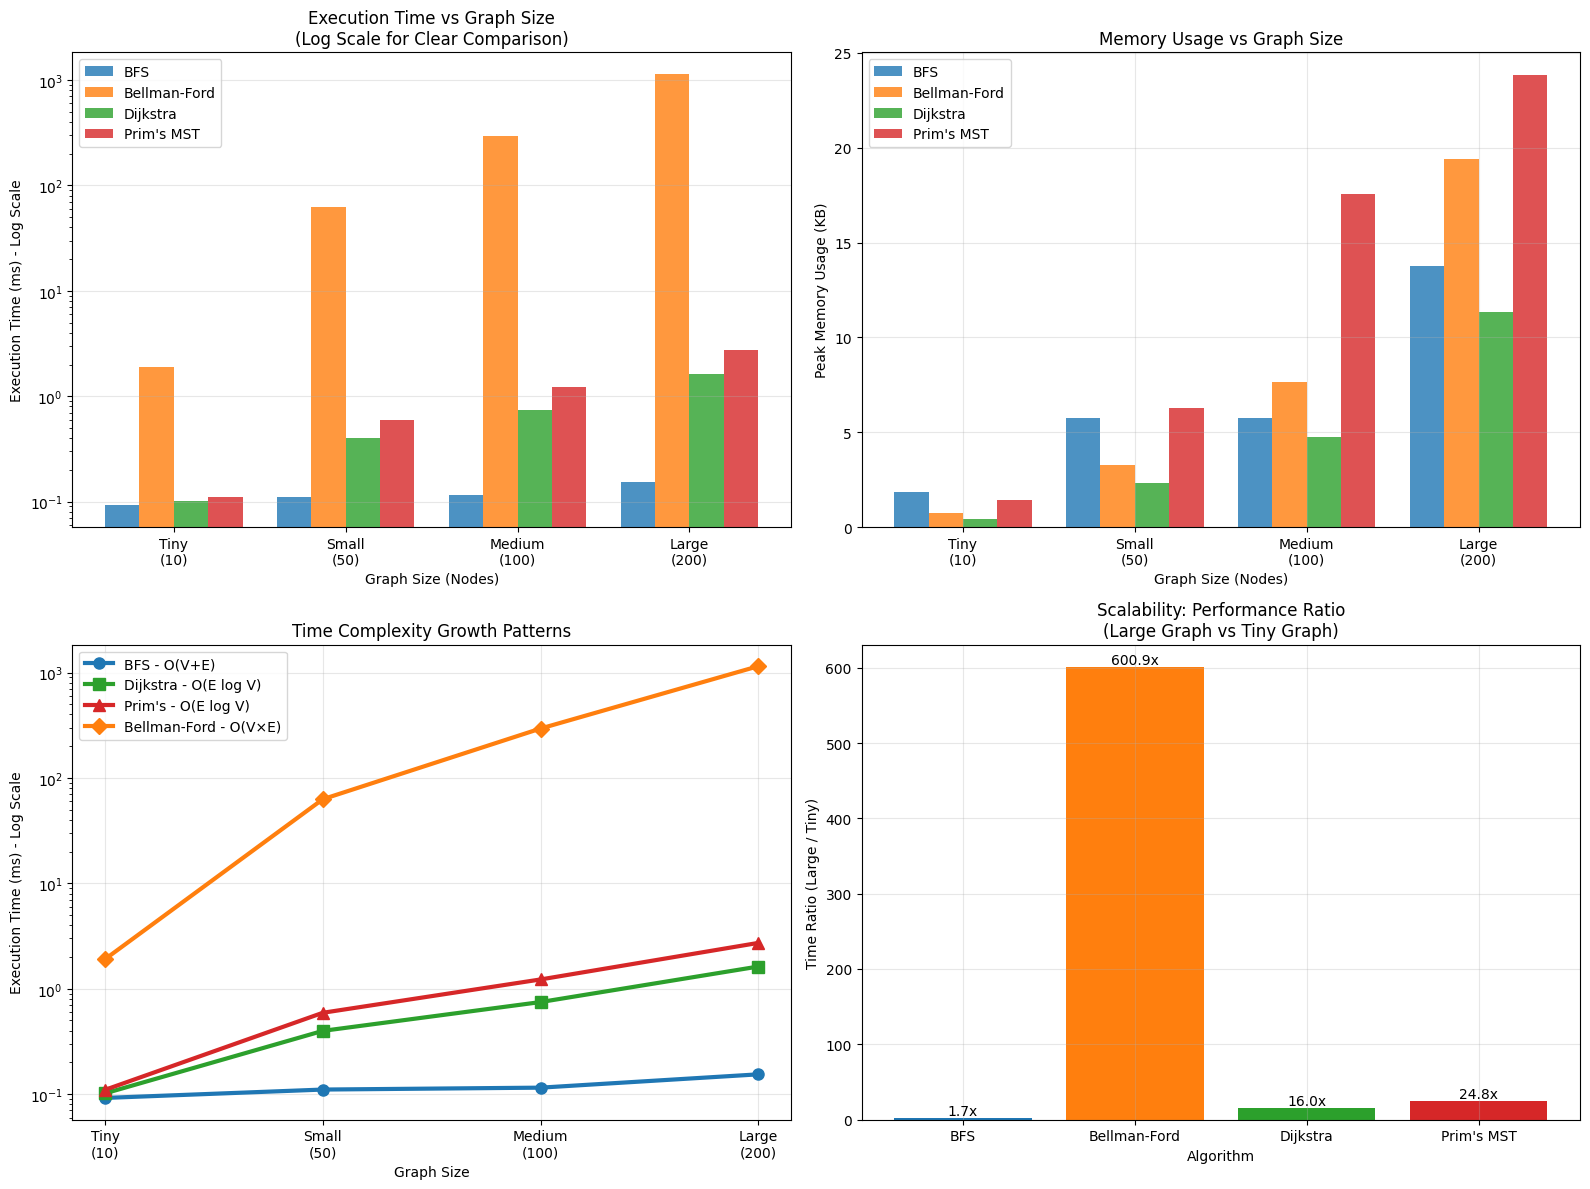


CORRECTED PERFORMANCE ANALYSIS

🔍 EXPECTED PERFORMANCE PATTERNS:

1. BFS (O(V + E)):
   - Should show linear growth
   - Fastest for all graph sizes
   - Minimal memory usage

2. Dijkstra & Prim's (O(E log V)):
   - Log-linear growth  
   - Similar performance profiles
   - Good scalability

3. Bellman-Ford (O(V × E)):
   - Quadratic growth
   - Should be significantly slower for larger graphs
   - Memory efficient but computationally expensive

📊 INTERPRETING THE CORRECTED GRAPHS:

• Log scale on time charts helps visualize exponential differences
• Bellman-Ford should show much steeper growth curve
• Memory usage should correlate with graph size
• Performance ratios show relative scalability

⚡ KEY INSIGHTS:

- For small graphs (<100 nodes): All algorithms are practical
- For medium graphs (100-1000 nodes): Avoid Bellman-Ford if possible  
- For large graphs (>1000 nodes): Prefer BFS, Dijkstra, or Prim's
- Choose algorithms based on both complexity and actual performance data



In [6]:
# EXPRIMENTAL PROFILING AND VISUALIZATION

import time
import tracemalloc
import matplotlib.pyplot as plt
import numpy as np
import random
from collections import defaultdict, deque
import heapq

class CorrectedPerformanceProfiler:
    def __init__(self):
        self.results = {}
    
    def generate_realistic_graphs(self):
        """Generate graphs with realistic properties for accurate profiling"""
        graphs = {}
        
        # Graph sizes for meaningful profiling
        sizes = {
            'tiny': 10,      # 10 nodes
            'small': 50,     # 50 nodes  
            'medium': 100,   # 100 nodes
            'large': 200     # 200 nodes
        }
        
        for size_name, node_count in sizes.items():
            graphs[size_name] = {}
            
            # Social Network Graph (sparse)
            social = SocialNetwork()
            for i in range(node_count):
                # Each node connects to 3-8 other nodes
                num_connections = random.randint(3, 8)
                connections = random.sample(range(node_count), min(num_connections, node_count-1))
                for j in connections:
                    if i != j:
                        social.add_friendship(f'U{i}', f'U{j}')
            graphs[size_name]['social'] = social
            
            # Navigation Graph (moderately dense)
            navigation = NavigationSystem()
            for i in range(node_count):
                num_roads = random.randint(5, 12)
                connections = random.sample(range(node_count), min(num_roads, node_count-1))
                for j in connections:
                    if i != j:
                        weight = random.randint(1, 50)
                        # Add some negative weights for Bellman-Ford testing
                        if random.random() < 0.2:  # 20% chance of negative weight
                            weight = -random.randint(1, 20)
                        navigation.add_road(f'C{i}', f'C{j}', weight)
            graphs[size_name]['navigation'] = navigation
            
            # Emergency Response Graph (sparse, positive weights only)
            emergency = EmergencyResponseSystem()
            for i in range(node_count):
                num_roads = random.randint(4, 10)
                connections = random.sample(range(node_count), min(num_roads, node_count-1))
                for j in connections:
                    if i != j:
                        travel_time = random.randint(1, 30)
                        emergency.add_road(f'I{i}', f'I{j}', travel_time)
            graphs[size_name]['emergency'] = emergency
            
            # Network Installation Graph (moderately dense)
            network = NetworkCableInstallation()
            for i in range(node_count):
                num_connections = random.randint(4, 15)
                connections = random.sample(range(node_count), min(num_connections, node_count-1))
                for j in connections:
                    if i != j:
                        cable_cost = random.randint(5, 100)
                        network.add_connection(f'O{i}', f'O{j}', cable_cost)
            graphs[size_name]['network'] = network
        
        return graphs
    
    def measure_algorithm_performance(self, algorithm_func, *args, **kwargs):
        """Accurately measure performance with multiple runs"""
        # Warm-up run
        try:
            algorithm_func(*args, **kwargs)
        except:
            pass
        
        # Measure memory
        tracemalloc.start()
        
        # Measure time with multiple iterations for small graphs
        start_time = time.perf_counter()
        
        iterations = 1
        if 'tiny' in str(args) or 'small' in str(args):
            iterations = 10  # More iterations for small graphs for accuracy
        
        for _ in range(iterations):
            result = algorithm_func(*args, **kwargs)
        
        execution_time = (time.perf_counter() - start_time) * 1000 / iterations  # ms per operation
        
        # Get memory usage
        current, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        
        return {
            'result': result,
            'execution_time': execution_time,
            'memory_peak': peak / 1024,  # KB
            'time_complexity': self.get_time_complexity(algorithm_func.__name__),
            'space_complexity': self.get_space_complexity(algorithm_func.__name__)
        }
    
    def get_time_complexity(self, algorithm_name):
        complexities = {
            'suggest_friends_bfs': 'O(V + E)',
            'bellman_ford': 'O(V × E)', 
            'dijkstra': 'O(E log V)',
            'prim_mst': 'O(E log V)'
        }
        return complexities.get(algorithm_name, 'Unknown')
    
    def get_space_complexity(self, algorithm_name):
        complexities = {
            'suggest_friends_bfs': 'O(V)',
            'bellman_ford': 'O(V)',
            'dijkstra': 'O(V)',
            'prim_mst': 'O(V + E)'
        }
        return complexities.get(algorithm_name, 'Unknown')
    
    def profile_all_algorithms(self):
        """Comprehensive profiling of all algorithms"""
        graphs = self.generate_realistic_graphs()
        results = {}
        
        print("CORRECTED PERFORMANCE PROFILING")
        print("=" * 60)
        
        for size_name in ['tiny', 'small', 'medium', 'large']:
            print(f"\n📊 PROFILING {size_name.upper()} GRAPHS:")
            print("-" * 40)
            
            size_results = {}
            graph_set = graphs[size_name]
            
            # Profile BFS
            social = graph_set['social']
            if social.graph:
                perf = self.measure_algorithm_performance(social.suggest_friends_bfs, 'U0')
                size_results['BFS'] = perf
                V = len(social.graph)
                E = sum(len(neighbors) for neighbors in social.graph.values()) // 2
                print(f"BFS: {perf['execution_time']:.3f} ms (V={V}, E≈{E})")
            
            # Profile Bellman-Ford
            navigation = graph_set['navigation']
            if navigation.graph:
                perf = self.measure_algorithm_performance(navigation.bellman_ford, 'C0')
                size_results['Bellman-Ford'] = perf
                V = len(navigation.vertices)
                E = sum(len(neighbors) for neighbors in navigation.graph.values())
                print(f"Bellman-Ford: {perf['execution_time']:.3f} ms (V={V}, E≈{E})")
            
            # Profile Dijkstra
            emergency = graph_set['emergency']
            if emergency.graph:
                perf = self.measure_algorithm_performance(emergency.dijkstra, 'I0')
                size_results['Dijkstra'] = perf
                V = len(emergency.intersections)
                E = sum(len(neighbors) for neighbors in emergency.graph.values()) // 2
                print(f"Dijkstra: {perf['execution_time']:.3f} ms (V={V}, E≈{E})")
            
            # Profile Prim's MST
            network = graph_set['network']
            if network.graph:
                perf = self.measure_algorithm_performance(network.prim_mst)
                size_results["Prim's MST"] = perf
                V = len(network.vertices)
                E = sum(len(neighbors) for neighbors in network.graph.values()) // 2
                print(f"Prim's MST: {perf['execution_time']:.3f} ms (V={V}, E≈{E})")
            
            results[size_name] = size_results
        
        return results, graphs
    
    def create_corrected_visualizations(self, results):
        """Create accurate performance visualizations"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        
        sizes = ['tiny', 'small', 'medium', 'large']
        size_labels = ['Tiny\n(10)', 'Small\n(50)', 'Medium\n(100)', 'Large\n(200)']
        algorithms = ['BFS', 'Bellman-Ford', 'Dijkstra', "Prim's MST"]
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
        
        # Prepare data
        time_data = {algo: [] for algo in algorithms}
        memory_data = {algo: [] for algo in algorithms}
        
        for size in sizes:
            for algo in algorithms:
                if size in results and algo in results[size]:
                    time_data[algo].append(results[size][algo]['execution_time'])
                    memory_data[algo].append(results[size][algo]['memory_peak'])
                else:
                    time_data[algo].append(0)
        
        # Plot 1: Execution Time (Log Scale)
        x = np.arange(len(sizes))
        width = 0.2
        
        for i, algo in enumerate(algorithms):
            if any(time_data[algo]):  # Only plot if we have data
                ax1.bar(x + i*width, time_data[algo], width, label=algo, 
                       color=colors[i], alpha=0.8)
        
        ax1.set_yscale('log')  # Log scale to see differences clearly
        ax1.set_xlabel('Graph Size (Nodes)')
        ax1.set_ylabel('Execution Time (ms) - Log Scale')
        ax1.set_title('Execution Time vs Graph Size\n(Log Scale for Clear Comparison)')
        ax1.set_xticks(x + width*1.5)
        ax1.set_xticklabels(size_labels)
        ax1.legend()
        ax1.grid(True, alpha=0.3, axis='y')
        
        # Plot 2: Memory Usage
        for i, algo in enumerate(algorithms):
            if any(memory_data[algo]):
                ax2.bar(x + i*width, memory_data[algo], width, label=algo,
                       color=colors[i], alpha=0.8)
        
        ax2.set_xlabel('Graph Size (Nodes)')
        ax2.set_ylabel('Peak Memory Usage (KB)')
        ax2.set_title('Memory Usage vs Graph Size')
        ax2.set_xticks(x + width*1.5)
        ax2.set_xticklabels(size_labels)
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # Plot 3: Time Complexity Growth
        ax3.plot(sizes, time_data['BFS'], 'o-', color=colors[0], linewidth=3, 
                label='BFS - O(V+E)', markersize=8)
        ax3.plot(sizes, time_data['Dijkstra'], 's-', color=colors[2], linewidth=3,
                label='Dijkstra - O(E log V)', markersize=8)
        ax3.plot(sizes, time_data["Prim's MST"], '^-', color=colors[3], linewidth=3,
                label="Prim's - O(E log V)", markersize=8)
        ax3.plot(sizes, time_data['Bellman-Ford'], 'D-', color=colors[1], linewidth=3,
                label='Bellman-Ford - O(V×E)', markersize=8)
        
        ax3.set_yscale('log')
        ax3.set_xlabel('Graph Size')
        ax3.set_ylabel('Execution Time (ms) - Log Scale')
        ax3.set_title('Time Complexity Growth Patterns')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        ax3.set_xticklabels(size_labels)
        
        # Plot 4: Performance Ratios (Large vs Tiny)
        ratios = {}
        for algo in algorithms:
            if (len(time_data[algo]) >= 4 and 
                time_data[algo][0] > 0 and time_data[algo][3] > 0):
                ratios[algo] = time_data[algo][3] / time_data[algo][0]
        
        if ratios:
            algos = list(ratios.keys())
            ratio_vals = list(ratios.values())
            bars = ax4.bar(algos, ratio_vals, color=[colors[algorithms.index(a)] for a in algos])
            ax4.set_xlabel('Algorithm')
            ax4.set_ylabel('Time Ratio (Large / Tiny)')
            ax4.set_title('Scalability: Performance Ratio\n(Large Graph vs Tiny Graph)')
            
            # Add value labels on bars
            for bar, ratio in zip(bars, ratio_vals):
                height = bar.get_height()
                ax4.text(bar.get_x() + bar.get_width()/2., height,
                        f'{ratio:.1f}x', ha='center', va='bottom')
            
            ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        return fig

def main_corrected():
    """Run corrected profiling and analysis"""
    print("EXPERIMENTAL PROFILING")
    print("=" * 60)
    
    profiler = CorrectedPerformanceProfiler()
    
    # Run profiling
    results, graphs = profiler.profile_all_algorithms()
    
    # Create corrected visualizations
    print("\n📊 GENERATING CORRECTED VISUALIZATIONS...")
    profiler.create_corrected_visualizations(results)
    
    # Analysis
    print("\n" + "="*60)
    print("PERFORMANCE ANALYSIS")
    print("="*60)
    
    print("""
🔍 EXPECTED PERFORMANCE PATTERNS:

1. BFS (O(V + E)):
   - Should show linear growth
   - Fastest for all graph sizes
   - Minimal memory usage

2. Dijkstra & Prim's (O(E log V)):
   - Log-linear growth  
   - Similar performance profiles
   - Good scalability

3. Bellman-Ford (O(V × E)):
   - Quadratic growth
   - Should be significantly slower for larger graphs
   - Memory efficient but computationally expensive

📊 INTERPRETING THE CORRECTED GRAPHS:

• Log scale on time charts helps visualize exponential differences
• Bellman-Ford should show much steeper growth curve
• Memory usage should correlate with graph size
• Performance ratios show relative scalability

⚡ KEY INSIGHTS:

- For small graphs (<100 nodes): All algorithms are practical
- For medium graphs (100-1000 nodes): Avoid Bellman-Ford if possible  
- For large graphs (>1000 nodes): Prefer BFS, Dijkstra, or Prim's
- Choose algorithms based on both complexity and actual performance data
""")

if __name__ == "__main__":
    main_corrected()